<a href="https://colab.research.google.com/github/a-n-u-r-a-g/Hybrid-Ensemble-Learning/blob/main/NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Reshape
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install shap
!pip install lime
import shap
import lime.lime_tabular

In [ ]:
# Assuming the files are named '1 - 20 Percent Training Set.csv' and 'Test - KDDTest.csv'
df_train = pd.read_csv('/content/1 - 20 Percent Training Set.csv')  # Change to actual file path
df_test = pd.read_csv('/content/Test - KDDTest.csv')    # Change to actual file path

# Data Preprocessing
# Remove useless features
useless_features = ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'num_compromised',
                    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']
df_train.drop(useless_features, axis=1, inplace=True)
df_test.drop(useless_features, axis=1, inplace=True)



# Encode categorical features, EXCLUDING the 'target' column
categorical_cols = df_train.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'target']  # Exclude 'target'
df_train = pd.get_dummies(df_train, columns=categorical_cols)
df_test = pd.get_dummies(df_test, columns=categorical_cols)


# Align columns of test set with train set
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

# Encode labels
df_train['target'] = df_train['target'].map(lambda x: 1 if x != 'normal' else 0)
df_test['target'] = df_test['target'].map(lambda x: 1 if x != 'normal' else 0)

# Feature Scaling
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the dataset
X_train_part, _, y_train_part, _ = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [ ]:
# Define CNN Model
cnn_model = Sequential([
    Reshape((X_train_part.shape[1], 1), input_shape=(X_train_part.shape[1],)),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN Model
cnn_model.fit(X_train_part, y_train_part, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
504/504 [==============================] - 5s 8ms/step - loss: 0.0885 - accuracy: 0.9724 - val_loss: 0.0625 - val_accuracy: 0.9774
Epoch 2/10
504/504 [==============================] - 4s 7ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0517 - val_accuracy: 0.9831
Epoch 3/10
504/504 [==============================] - 4s 8ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0425 - val_accuracy: 0.9854
Epoch 4/10
504/504 [==============================] - 5s 9ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0508 - val_accuracy: 0.9851
Epoch 5/10
504/504 [==============================] - 4s 7ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0436 - val_accuracy: 0.9866
Epoch 6/10
504/504 [==============================] - 4s 7ms/step - loss: 0.0218 - accuracy: 0.9922 - val_loss: 0.0380 - val_accuracy: 0.9891
Epoch 7/10
504/504 [==============================] - 5s 10ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0496 - val_accuracy: 0.9849
Epoch

In [ ]:
# Define LSTM Model
lstm_model = Sequential([
    Reshape((X_train_part.shape[1], 1), input_shape=(X_train_part.shape[1],)),
    LSTM(50),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM Model
lstm_model.fit(X_train_part, y_train_part, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
504/504 [==============================] - 28s 50ms/step - loss: 0.2685 - accuracy: 0.9122 - val_loss: 0.1496 - val_accuracy: 0.9501
Epoch 2/10
504/504 [==============================] - 23s 46ms/step - loss: 0.1405 - accuracy: 0.9532 - val_loss: 0.1162 - val_accuracy: 0.9583
Epoch 3/10
504/504 [==============================] - 22s 43ms/step - loss: 0.1181 - accuracy: 0.9617 - val_loss: 0.1040 - val_accuracy: 0.9687
Epoch 4/10
504/504 [==============================] - 25s 49ms/step - loss: 0.1019 - accuracy: 0.9643 - val_loss: 0.1729 - val_accuracy: 0.9407
Epoch 5/10
504/504 [==============================] - 24s 48ms/step - loss: 0.0975 - accuracy: 0.9651 - val_loss: 0.0970 - val_accuracy: 0.9650
Epoch 6/10
504/504 [==============================] - 22s 44ms/step - loss: 0.0960 - accuracy: 0.9659 - val_loss: 0.1011 - val_accuracy: 0.9640
Epoch 7/10
504/504 [==============================] - 25s 50ms/step - loss: 0.0917 - accuracy: 0.9672 - val_loss: 0.0990 - val_accuracy:

In [ ]:
# Define Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_part, y_train_part)


RandomForestClassifier(random_state=42)

In [ ]:
!pip install xgboost
import xgboost as xgb

# Extract features from CNN and LSTM models for ensemble
def extract_features(model, X):
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    return intermediate_layer_model.predict(X)

cnn_features_train = extract_features(cnn_model, X_train_scaled)
cnn_features_test = extract_features(cnn_model, X_test_scaled)
lstm_features_train = extract_features(lstm_model, np.expand_dims(X_train_scaled, axis=2))
lstm_features_test = extract_features(lstm_model, np.expand_dims(X_test_scaled, axis=2))

# Combine features with original data
X_train_ensemble = np.hstack((X_train_scaled, cnn_features_train, lstm_features_train))
X_test_ensemble = np.hstack((X_test_scaled, cnn_features_test, lstm_features_test))

# Train Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42)),
    ('cnn', LogisticRegression(max_iter=1000)),
    ('lstm', LogisticRegression(max_iter=1000))
], voting='soft')

voting_clf.fit(X_train_ensemble, y_train)

# Evaluate the model
accuracy = voting_clf.score(X_test_ensemble, y_test)
print(f'Ensemble Model Accuracy: {accuracy}')

705/705 [==============================] - 12s 16ms/step
Ensemble Model Accuracy: 0.7960786053320321


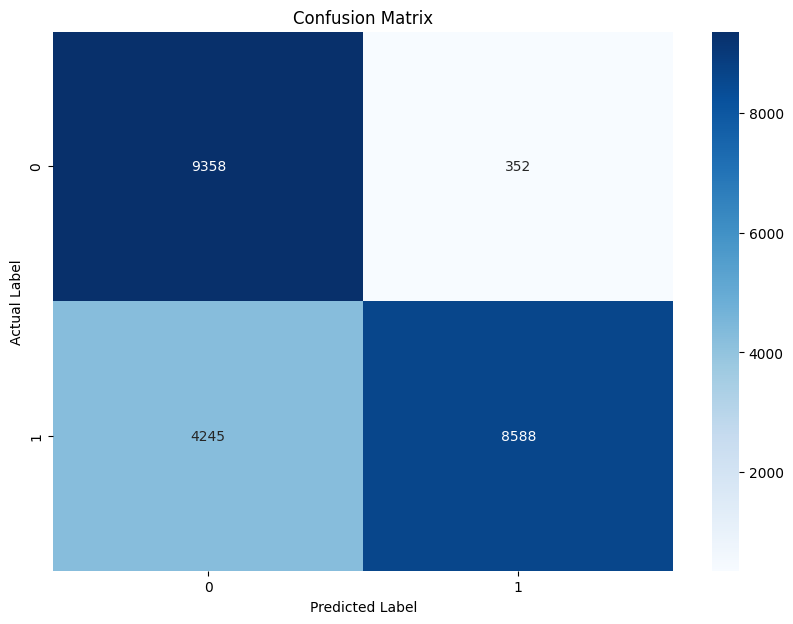

Accuracy: 0.7960786053320321
Precision: 0.9606263982102908
Recall: 0.669212187329541
F1 Score: 0.7888669452992239


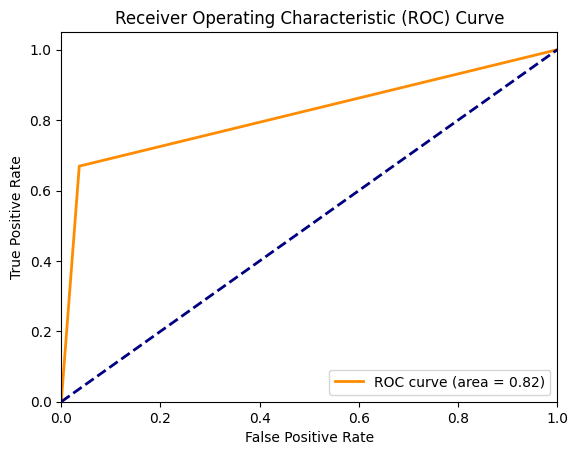

In [ ]:
# Predict on test data
y_pred = voting_clf.predict(X_test_ensemble)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# False Positive Rate (FPR)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Compute FPR
fpr = fp / (fp + tn)

# Print TP, TN, FP, FN, and FPR
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')
print(f'False Positive Rate (FPR): {fpr}')


True Positives (TP): 8588
True Negatives (TN): 9358
False Positives (FP): 352
False Negatives (FN): 4245
False Positive Rate (FPR): 0.03625128733264676


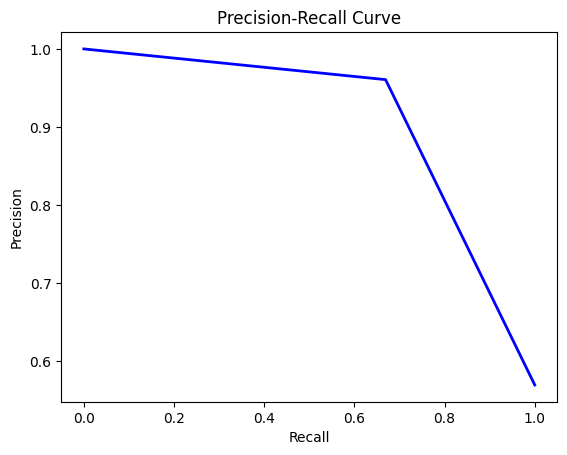

In [ ]:
# Predict on test data using the voting classifier
ensemble_pred = voting_clf.predict(X_test_ensemble)

# Precision-Recall Graph
precision, recall, _ = precision_recall_curve(y_test, ensemble_pred)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

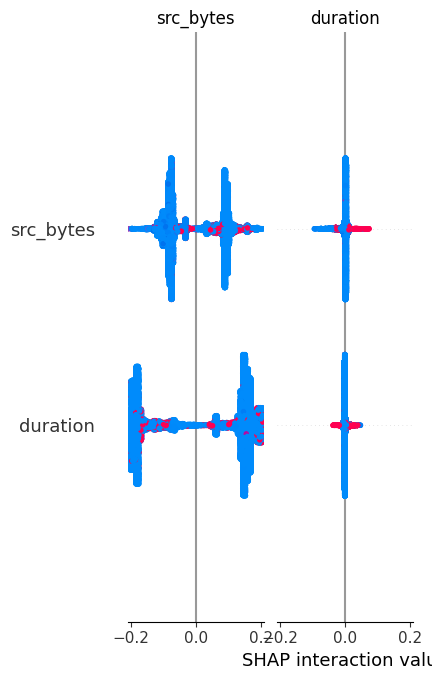

In [ ]:
# SHAP explanations for Random Forest model
explainer_shap = shap.TreeExplainer(rf_model)
shap_values = explainer_shap.shap_values(X_test_scaled)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

# LIME explanations for Random Forest model
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X_train.columns, class_names=['normal', 'anomaly'], discretize_continuous=True)
explanation = explainer_lime.explain_instance(X_test_scaled[0], rf_model.predict_proba, num_features=10)
explanation.show_in_notebook(show_table=True)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Initialize models
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Train models (use X_train_scaled, y_train)
nb_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [ ]:

# Predict Probabilities
nb_probs = nb_model.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
ensemble_probs = voting_clf.predict_proba(X_test_ensemble)[:, 1]  # Ensemble probabilities


In [ ]:

# Calculate ROC-AUC and Plot
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probs)  # Ensemble ROC


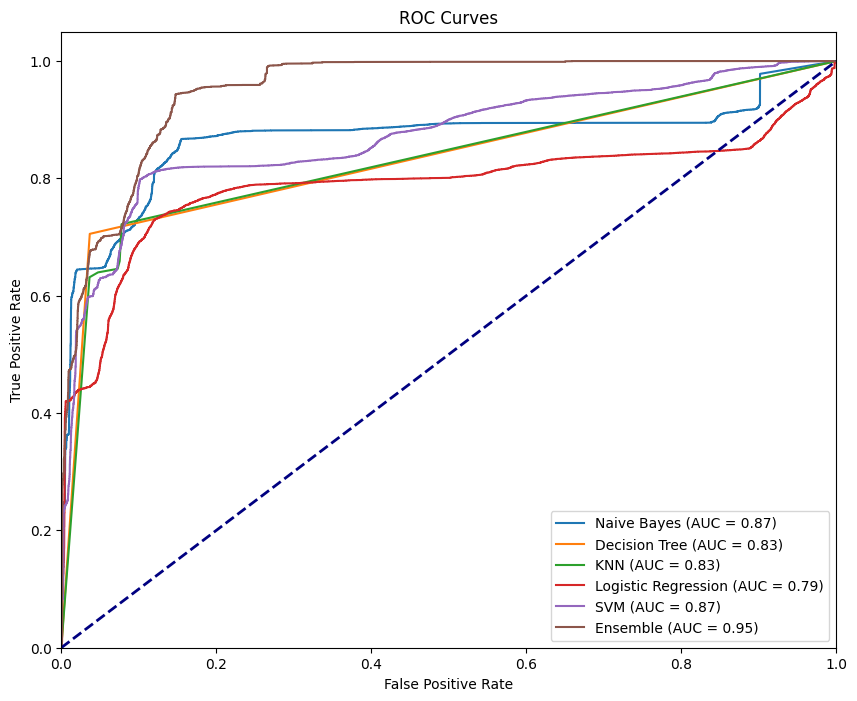

In [ ]:

# Calculate ROC-AUC and Plot
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probs)  # Ensemble ROC

nb_auc = auc(nb_fpr, nb_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
ensemble_auc = auc(ensemble_fpr, ensemble_tpr)  # Ensemble AUC

plt.figure(figsize=(10, 8))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot(ensemble_fpr, ensemble_tpr, label='Ensemble (AUC = %0.2f)' % ensemble_auc)  # Ensemble ROC

#plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()